# Trabalho de DataScience
### Vinícius Almeida Bernardino de Souza | RM: 97888
### Camilly Breitbach Ishida | RM: 551474

Análise feita sobre os personagens do jogo eletrônico "Stardew Valley".

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/ViniciusBerns/ExercicioDataScience/main/villagers.csv'
df = pd.read_csv(url)
df.head(10)

,Name,Gender,Marriage Candidate,Giftable,Heart Events
0,Alex,Male,Yes,Yes,8
1,Elliot,Male,Yes,Yes,7
2,Harvey,Male,Yes,Yes,7
3,Sam,Male,Yes,Yes,8
4,Sebastian,Male,Yes,Yes,7
5,Shane,Male,Yes,Yes,12
6,Abigail,Female,Yes,Yes,8
7,Emily,Female,Yes,Yes,10
8,Haley,Female,Yes,Yes,7
9,Leah,Female,Yes,Yes,10


In [ ]:
# relação quantidadeNPC-gênero
# relação quantidadeNPC-casável (mulheres)
# relação quantidadeNPC-casável (homem)
# relação quantidadeNPC-presenteável
# relação gênero-heartEvents
# relação gênero-casável
# relação presenteável-heartEvents

In [ ]:
df.columns

Index(['Name', 'Gender', 'Marriage Candidate', 'Giftable', 'Heart Events'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                45 non-null     object
 1   Gender              42 non-null     object
 2   Marriage Candidate  45 non-null     object
 3   Giftable            45 non-null     object
 4   Heart Events        45 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.9+ KB


## 1. Qual a quantidade de personagens de cada gênero?

In [ ]:
qtd_genero = df['Gender'].size
print(f"A quantidade total de aldeões é de {qtd_genero}.")

A quantidade total de aldeões é de 45.


In [ ]:
genero = df['Gender'].value_counts(dropna=False)
genero

Gender
Male      27
Female    15
NaN        3
Name: count, dtype: int64

In [ ]:
genero_df = pd.DataFrame({
    'Gênero': ['Homens','Mulheres','Neutro'],
    'Quantidade': genero.values
})

In [ ]:
M = genero['Male']
F = genero['Female']
print(f"Do total de 45 aldeões: {M} são homens, {F} são mulheres e 3 não possuem gênero.")

Do total de 45 aldeões: 27 são homens, 15 são mulheres e 3 não possuem gênero.


### Resposta:

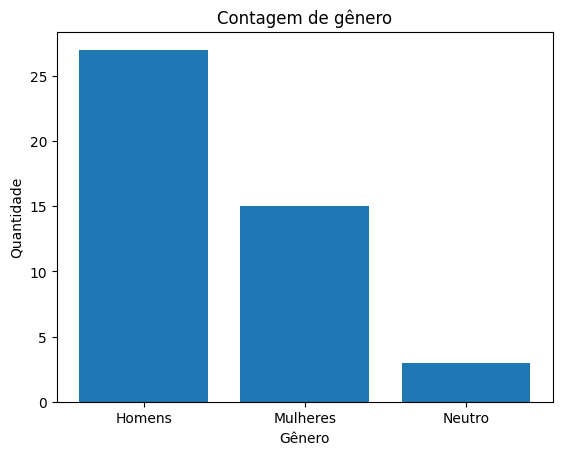

In [ ]:
plt.bar(genero_df['Gênero'], genero_df['Quantidade'])
plt.title("Contagem de gênero")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.show()

## 2. Qual porcentagem de personagens (mulheres) é possível casar-se?

In [ ]:
df2 = pd.DataFrame({
    'Gênero': df['Gender'],
    'Casável': df['Marriage Candidate']
})

In [ ]:
df3 = pd.DataFrame(df2.groupby(['Gênero','Casável']).size().reset_index(name='Contagem'))

In [ ]:
casamentoMulheres = df3[df3['Gênero'] == 'Female']
casamentoMulheres['Casável'] = casamentoMulheres['Casável'].replace({'Yes': 'Casável', 'No': 'Não-casável'})
casamentoMulheres

<ipython-input-50-e8b244a70a46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casamentoMulheres['Casável'] = casamentoMulheres['Casável'].replace({'Yes': 'Casável', 'No': 'Não-casável'})


,Gênero,Casável,Contagem
0,Female,Não-casável,9
1,Female,Casável,6


### Resposta:

<function matplotlib.pyplot.show(close=None, block=None)>

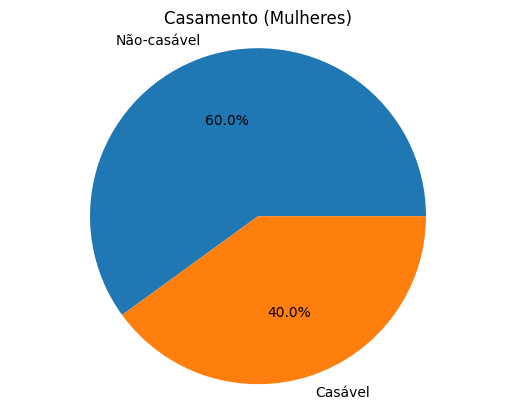

In [ ]:
plt.pie(x=casamentoMulheres['Contagem'], labels=casamentoMulheres['Casável'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Casamento (Mulheres)')
plt.show

## 3. Qual porcentagem de personagens (homens) é possível casar-se?

In [ ]:
df3

,Gênero,Casável,Contagem
0,Female,No,9
1,Female,Yes,6
2,Male,No,21
3,Male,Yes,6


In [ ]:
casamentoHomens = df3[df3['Gênero'] == 'Male']
casamentoHomens['Casável'] = casamentoHomens['Casável'].replace({'Yes': 'Casável', 'No': 'Não-casável'})
casamentoHomens

<ipython-input-53-02dde5ef2cd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casamentoHomens['Casável'] = casamentoHomens['Casável'].replace({'Yes': 'Casável', 'No': 'Não-casável'})


,Gênero,Casável,Contagem
2,Male,Não-casável,21
3,Male,Casável,6


### Resposta:

<function matplotlib.pyplot.show(close=None, block=None)>

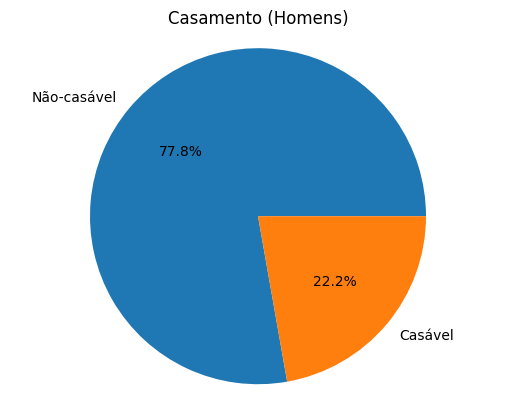

In [ ]:
plt.pie(x=casamentoHomens['Contagem'], labels=casamentoHomens['Casável'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Casamento (Homens)')
plt.show

## 4. Relação de gênero e eventos de amizade

In [ ]:
df['Heart Events'].sum()

178

In [ ]:
dfGenEven =  df[['Gender','Heart Events']]
type(dfGenEven)

pandas.core.frame.DataFrame

In [ ]:
dfGenEven = dfGenEven.groupby(['Gender', 'Heart Events']).size()

In [ ]:
dfGenEven = dfGenEven.reset_index().sort_values(['Gender', 'Heart Events'])
dfGenEven

,Gender,Heart Events,0
0,Female,0,1
1,Female,1,1
2,Female,2,1
3,Female,3,2
4,Female,4,1
5,Female,5,3
6,Female,7,3
7,Female,8,1
8,Female,10,2
9,Male,0,9


In [ ]:
dfGenEvenHomem = dfGenEven[dfGenEven['Gender'] == 'Male']
dfGenEvenHomem = dfGenEvenHomem['Heart Events'].sum()
dfGenEvenHomem

48

In [ ]:
dfGenEvenHomem = dfGenEvenHomem['Heart Events'].sum()

In [ ]:
dfGenEvenMulheres = dfGenEven[dfGenEven['Gender'] == 'Female']
dfGenEvenMulheres['Heart Events'].sum()


40

In [ ]:
dfGenEvenAmizade = pd.DataFrame({
    'Gênero': ['Homens', 'Mulheres'],
    'Eventos de Amizadde': [48, 40]
})

dfGenEvenAmizade

,Gênero,Eventos de Amizadde
0,Homens,48
1,Mulheres,40


### Resposta:

<function matplotlib.pyplot.show(close=None, block=None)>

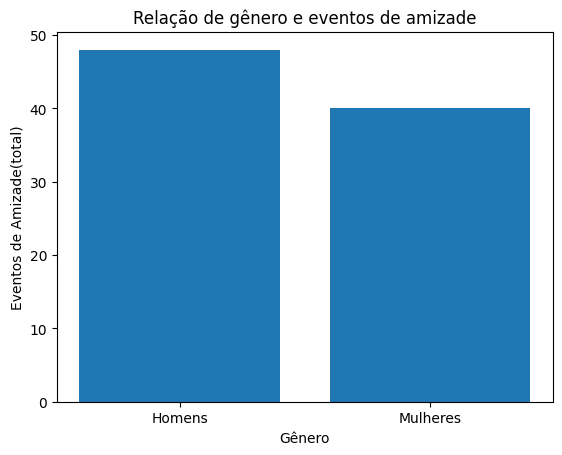

In [ ]:
plt.bar(x=dfGenEvenAmizade['Gênero'], height=dfGenEvenAmizade['Eventos de Amizadde'])
plt.xlabel("Gênero")
plt.ylabel("Eventos de Amizade(total)")
plt.title("Relação de gênero e eventos de amizade")
plt.show

## 5. Qual a porcentagem de personagens presenteáveis?

In [ ]:
giftable = df[df['Giftable'] == 'Yes'].shape[0]
not_giftable = df[df['Giftable'] == 'No'].shape[0]

In [ ]:
total = giftable + not_giftable
percentages = [giftable/total*100, not_giftable/total*100]

### Resposta:

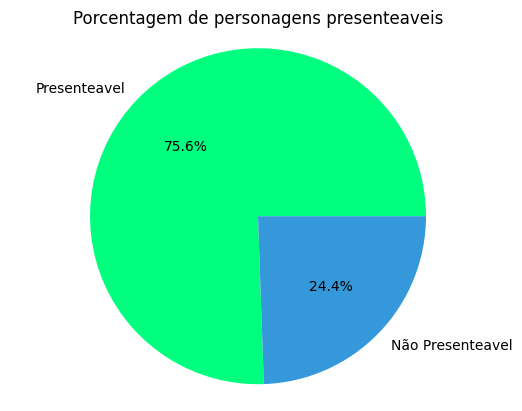

In [ ]:
labels = ['Presenteavel', 'Não Presenteavel']
colors = ['#00ff7f', '#3498db']
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Porcentagem de personagens presenteaveis')
plt.show()


## 6. Qual a relação entre personagens presenteáveis e eventos de amizade?

In [ ]:
df['Giftable'] = df['Giftable'].replace({'Yes': 'Sim', 'No': 'Não'})

### Resposta:
Observa-se que personagens que não possuem eventos de amizade não são presenteáveis.

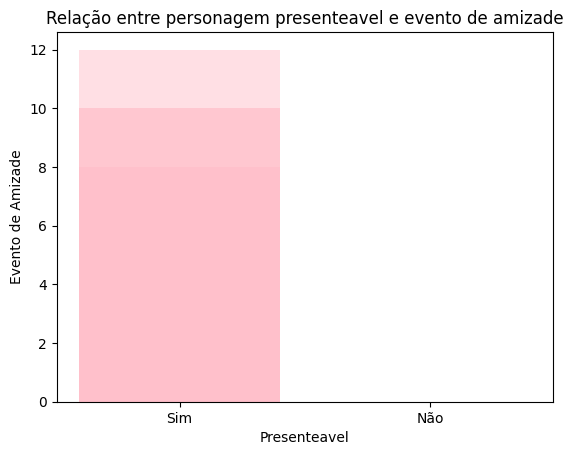

In [ ]:
plt.bar(df['Giftable'], df['Heart Events'], color='pink', alpha=0.5)
plt.xlabel('Presenteavel')
plt.ylabel('Evento de Amizade')
plt.title('Relação entre personagem presenteavel e evento de amizade')
plt.show()

## Quais são os gêneros dos personagens com quem se pode casar?

In [ ]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

gender_counts = pd.concat([gender_counts, pd.DataFrame({'Gender': ['NaN'], 'Count': [df['Gender'].isna().sum()]})])

### Resposta:

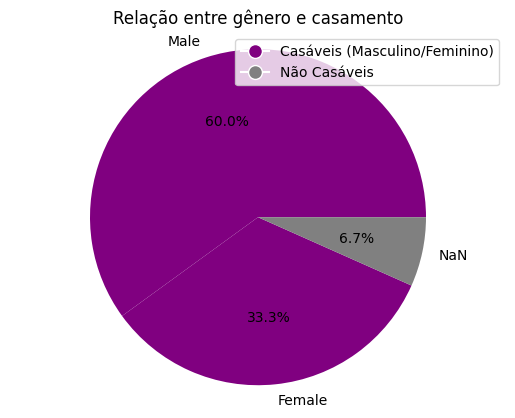

In [ ]:
colors = {'male': 'purple', 'female': 'purple', 'NaN': 'gray'}
plt.pie(gender_counts['Count'], labels=gender_counts['Gender'], autopct='%1.1f%%', colors=[colors.get(x.lower(), '#808080') for x in gender_counts['Gender']])
plt.axis('equal')

plt.title('Relação entre gênero e casamento')
purple_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Casáveis (Masculino/Feminino)')
gray_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Não Casáveis')
plt.legend(handles=[purple_patch, gray_patch], loc='upper right')

plt.show()
